In [1]:
import utils
from pathlib import Path
import pandas as pd

In [2]:
df = utils.load_transactions(Path("../data/jointexpenses/"))
df = utils.clean(df)
print(df.shape)
df = utils.deduplicate_transactions(df)
print(df.shape)
df = utils.classify_transactions(df)

other_transactions = df[df.classification == "Other"]
ground_truth_transactions = df[df.classification != "Other"]

X = ground_truth_transactions.desc
y = ground_truth_transactions.classification

(1706, 5)
Found 507 duplicated entries 
and 0 duplicates on the same day from the same file.
(765, 5)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
# print(vect.vocabulary_)

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
config = {"class_weight": "balanced"}
model = LogisticRegression(**config)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

Accuracy:  0.9726775956284153
(Precision, Recall, F1-score, support): (0.9785063752276867, 0.9726775956284153, 0.9736871882938856, None)


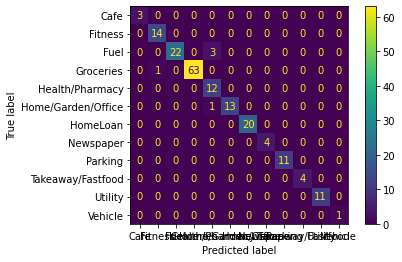

In [7]:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print(
    f"(Precision, Recall, F1-score, support): {precision_recall_fscore_support(y_test, y_pred_class, average='weighted')}"
)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_class)
plt.show()